In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

In [3]:
# import population data
pop_dat = pd.read_csv('populations.csv')

# import covid data
covid = pd.read_csv('us-states.csv')

In [4]:
pop_dat = pop_dat.set_index('NAME')

covid = covid.drop_duplicates(['state'], keep = 'last')

In [5]:
covid = covid.set_index('state')

In [6]:
meta_data = pop_dat.join(covid, how = 'inner')

In [7]:
meta_data

,POPESTIMATE2019,date,fips,cases,deaths
Alabama,4903185,2020-04-19,1,4903,160
Alaska,731545,2020-04-19,2,317,7
Arizona,7278717,2020-04-19,4,4929,188
Arkansas,3017804,2020-04-19,5,1781,39
California,39512223,2020-04-19,6,31544,1176
Colorado,5758736,2020-04-19,8,9730,421
Connecticut,3565287,2020-04-19,9,17962,1127
Delaware,973764,2020-04-19,10,2538,67
District of Columbia,705749,2020-04-19,11,2793,96
Florida,21477737,2020-04-19,12,26306,773


In [8]:
meta_data.info()

cases_list = meta_data['cases'].to_list()

ppl_list = meta_data['POPESTIMATE2019'].to_list()

correlation = stats.pearsonr(ppl_list,cases_list)

correlation

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   POPESTIMATE2019  51 non-null     int64 
 1   date             51 non-null     object
 2   fips             51 non-null     int64 
 3   cases            51 non-null     int64 
 4   deaths           51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


(0.42984718576642367, 0.0016438284230318363)

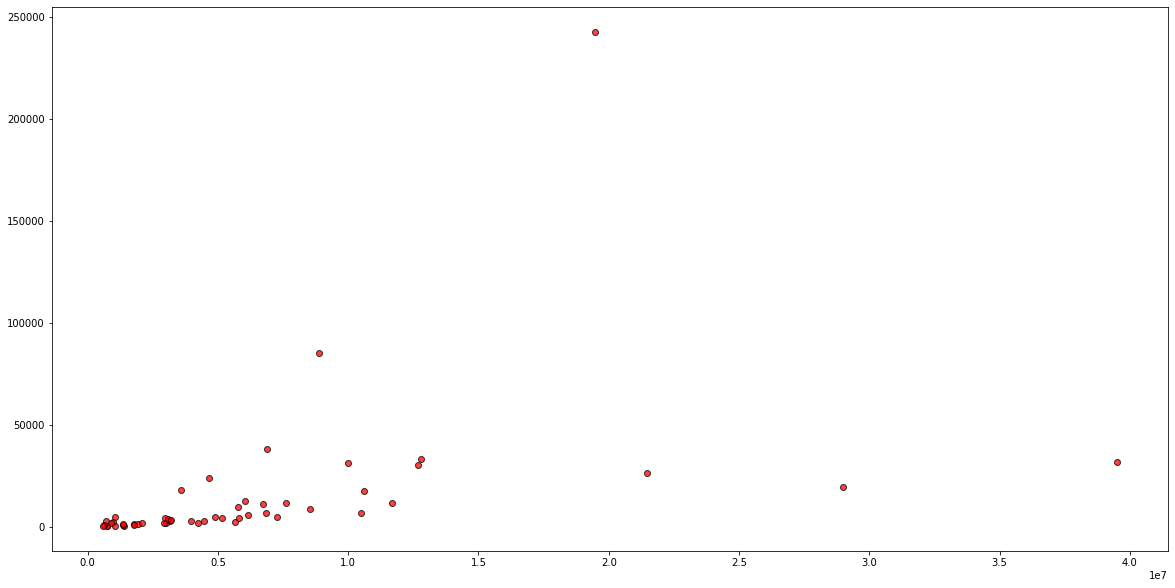

In [11]:
plt.figure(figsize=(20,10))

plt.scatter(ppl_list, cases_list, marker="o", facecolors="red", edgecolors="black",
            alpha=.75)
plt.xlabel('')